In [0]:
from google.colab import drive

In [0]:
NUM_CLASSES = 2

In [19]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [0]:
from tensorflow.keras import models, layers
import cv2

In [0]:
def load_data(dir: str, classes: int):
  X = []
  y = []
  for i in range(classes):
    for j in os.listdir(f'{dir}/data (1)/gesture-{i} (1)/'):
      img = Image.open(f'{dir}/data (1)/gesture-{i} (1)/{j}').convert('L')
      img = img.resize((128, 128))
      arr = np.array(img)
      X.append(arr)
      y.append(i)
  X = np.array(X, dtype = 'float64')
  X = X.reshape(len(y), 128, 128, 1)
  y_old = np.array(y)
  y = np.zeros((len(y), classes))
  for i in range(len(y)):
    y[i][y_old[i] - 1] = 1
  return X/255, y_old

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
X, y = load_data('drive/My Drive/Colab Notebooks', NUM_CLASSES)

In [120]:
np.zeros((1, 1))

array([[0.]])

In [121]:
X.shape

(247, 128, 128, 1)

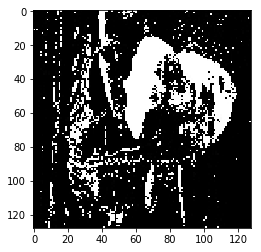

In [123]:
plt.imshow(X[-3, :, :, 0], cmap='gray')

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_further,y_train,y_further = train_test_split(X,y,test_size = 0.2)
X_validate,X_test,y_validate,y_test = train_test_split(X_further,y_further,test_size = 0.5)


In [0]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(128, 128, 1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [132]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_validate, y_validate))

Train on 197 samples, validate on 25 samples
Epoch 1/10
197/197 [==============================] - 0s 2ms/sample - loss: 1.4999 - acc: 0.5228 - val_loss: 0.9133 - val_acc: 0.4800
Epoch 2/10
197/197 [==============================] - 0s 581us/sample - loss: 0.5671 - acc: 0.7919 - val_loss: 0.9427 - val_acc: 0.4800
Epoch 3/10
197/197 [==============================] - 0s 551us/sample - loss: 0.3665 - acc: 0.8579 - val_loss: 0.5482 - val_acc: 0.8800
Epoch 4/10
197/197 [==============================] - 0s 574us/sample - loss: 0.2816 - acc: 0.8579 - val_loss: 0.3026 - val_acc: 0.8800
Epoch 5/10
197/197 [==============================] - 0s 560us/sample - loss: 0.0617 - acc: 0.9898 - val_loss: 0.3308 - val_acc: 0.8800
Epoch 6/10
197/197 [==============================] - 0s 537us/sample - loss: 0.1096 - acc: 0.9645 - val_loss: 0.0854 - val_acc: 0.9600
Epoch 7/10
197/197 [==============================] - 0s 528us/sample - loss: 0.0155 - acc: 0.9949 - val_loss: 0.0155 - val_acc: 1.0000
Epoch

In [0]:
import datetime
model.save(f'drive/My Drive/Colab Notebooks/{datetime.datetime.now()}.h5')